In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
read_data = pd.read_csv('/home/dataguy/final_task/clean_read_data.csv', sep=';', names= ['my_date','my_time','event_type','country','user_id','source','topic'])

In [3]:
read_data.head()

,my_date,my_time,event_type,country,user_id,source,topic
0,2018-01-01,00:01:01,read,country_7,2458151261,SEO,North America
1,2018-01-01,00:03:20,read,country_7,2458151262,SEO,South America
2,2018-01-01,00:04:01,read,country_7,2458151263,AdWords,Africa
3,2018-01-01,00:04:02,read,country_7,2458151264,AdWords,Europe
4,2018-01-01,00:05:03,read,country_8,2458151265,Reddit,North America


In [4]:
buy_data = pd.read_csv('/home/dataguy/final_task/clean_buy_data.csv', sep=';', names= ['my_date','my_time','event_type','user_id','price'])

In [5]:
buy_data.head()

,my_date,my_time,event_type,user_id,price
0,2018-01-01,04:04:59,buy,2458151555,8
1,2018-01-01,09:28:00,buy,2458151933,8
2,2018-01-01,13:23:16,buy,2458152245,8
3,2018-01-01,14:20:43,buy,2458152315,8
4,2018-01-01,16:56:04,buy,2458152371,8


In [6]:
subscribe_data = pd.read_csv('/home/dataguy/final_task/clean_subscribe_data.csv', sep=';', names= ['my_date','my_time','event_type','user_id'])

In [7]:
subscribe_data.head()

,my_date,my_time,event_type,user_id
0,2018-01-01,00:07:41,subscribe,2458151268
1,2018-01-01,00:07:44,subscribe,2458151267
2,2018-01-01,00:40:55,subscribe,2458151309
3,2018-01-01,01:26:26,subscribe,2458151358
4,2018-01-01,01:30:39,subscribe,2458151361


## User segments by source

In [8]:
read_data.groupby('source').count()[['event_type']]

,event_type
source,
AdWords,63065
Reddit,105216
SEO,41742


## Topics ranked by popularity

### Dilan should focus more on the topics that has the most readers, i.e: Asia and North America

In [9]:
read_data.groupby('topic').count()[['event_type']].sort_values('event_type', ascending=False)

,event_type
topic,
Asia,194925
North America,130334
Europe,93697
South America,76801
Africa,43394
Australia,42726


In [33]:
read_data.merge(buy_data, on='user_id').head()

,my_date_x,my_time_x,event_type_x,country,user_id,source,topic,my_date_y,my_time_y,event_type_y,price
0,2018-01-01,00:13:39,read,country_4,2458151279,SEO,North America,2018-01-04,00:50:27,buy,8
1,2018-01-01,00:13:39,read,country_4,2458151279,SEO,North America,2018-01-05,10:23:05,buy,80
2,2018-01-01,02:53:39,read,country_4,2458151279,NaN,Asia,2018-01-04,00:50:27,buy,8
3,2018-01-01,02:53:39,read,country_4,2458151279,NaN,Asia,2018-01-05,10:23:05,buy,80
4,2018-01-01,05:36:39,read,country_4,2458151279,NaN,Asia,2018-01-04,00:50:27,buy,8


## Revenue from the 8 dollar course and the 80 dollar course:
## 8x6640 = 53.120 
## 80x1767 = 141.360
## Total = 194.480

In [10]:
buy_data.groupby('price').count()[['event_type']]

,event_type
price,
8,6640
80,1767


## Users by country

In [12]:
read_data.groupby('country').count()[['event_type']]

,event_type
country,
country_1,6231
country_2,130076
country_3,9128
country_4,71258
country_5,149732
country_6,63752
country_7,132067
country_8,19633


## Cohort Analysis

In [11]:
cohort_data = pd.read_csv('/home/dataguy/final_task/data_for_cohort.csv', delimiter= ';', names=['date', 'time', 'event_type', 'user_id'])

In [36]:
cohort_data.head()

,date,time,event_type,user_id
0,2018-01-01,00:01:01,read,2458151261
1,2018-01-01,00:03:20,read,2458151262
2,2018-01-01,00:04:01,read,2458151263
3,2018-01-01,00:04:02,read,2458151264
4,2018-01-01,00:05:03,read,2458151265


In [8]:
import csv

In [38]:
user_reads = {}
with open('data_for_cohort.csv') as csvfile:
    readCSV = csv.reader(csvfile, delimiter=';')
    for row in readCSV:
        if row[3] not in user_reads:
            user_reads[row[3]] = []
        if row[0] not in user_reads[row[3]]:
            user_reads[row[3]].append(row[0])

In [39]:
user_reads_list = list(user_reads.values())

In [40]:
user_reads_list

[['2018-01-01'],
 ['2018-01-01'],
 ['2018-01-01'],
 ['2018-01-01'],
 ['2018-01-01'],
 ['2018-01-01'],
 ['2018-01-01', '2018-03-27'],
 ['2018-01-01'],
 ['2018-01-01'],
 ['2018-01-01'],
 ['2018-01-01', '2018-03-04', '2018-03-05'],
 ['2018-01-01'],
 ['2018-01-01', '2018-02-24', '2018-02-25', '2018-02-26'],
 ['2018-01-01'],
 ['2018-01-01'],
 ['2018-01-01', '2018-01-31', '2018-02-01', '2018-02-02', '2018-02-03'],
 ['2018-01-01'],
 ['2018-01-01', '2018-03-05'],
 ['2018-01-01',
  '2018-01-02',
  '2018-01-03',
  '2018-01-04',
  '2018-01-05',
  '2018-01-06'],
 ['2018-01-01'],
 ['2018-01-01'],
 ['2018-01-01'],
 ['2018-01-01'],
 ['2018-01-01', '2018-01-28', '2018-01-29'],
 ['2018-01-01'],
 ['2018-01-01'],
 ['2018-01-01', '2018-01-02', '2018-01-03', '2018-01-04'],
 ['2018-01-01'],
 ['2018-01-01', '2018-02-19', '2018-02-20', '2018-02-21'],
 ['2018-01-01'],
 ['2018-01-01'],
 ['2018-01-01'],
 ['2018-01-01'],
 ['2018-01-01'],
 ['2018-01-01'],
 ['2018-01-01'],
 ['2018-01-01'],
 ['2018-01-01'],
 ['2018-

In [53]:
from datetime import datetime, timedelta

start_date = datetime(2018, 1, 1)
end_date = datetime(2018, 3, 31)
delta = timedelta(days=1)

date_list = []
while start_date <= end_date:
    date_list.append(start_date.strftime("%Y-%m-%d"))
    start_date += delta

print(date_list)

['2018-01-01', '2018-01-02', '2018-01-03', '2018-01-04', '2018-01-05', '2018-01-06', '2018-01-07', '2018-01-08', '2018-01-09', '2018-01-10', '2018-01-11', '2018-01-12', '2018-01-13', '2018-01-14', '2018-01-15', '2018-01-16', '2018-01-17', '2018-01-18', '2018-01-19', '2018-01-20', '2018-01-21', '2018-01-22', '2018-01-23', '2018-01-24', '2018-01-25', '2018-01-26', '2018-01-27', '2018-01-28', '2018-01-29', '2018-01-30', '2018-01-31', '2018-02-01', '2018-02-02', '2018-02-03', '2018-02-04', '2018-02-05', '2018-02-06', '2018-02-07', '2018-02-08', '2018-02-09', '2018-02-10', '2018-02-11', '2018-02-12', '2018-02-13', '2018-02-14', '2018-02-15', '2018-02-16', '2018-02-17', '2018-02-18', '2018-02-19', '2018-02-20', '2018-02-21', '2018-02-22', '2018-02-23', '2018-02-24', '2018-02-25', '2018-02-26', '2018-02-27', '2018-02-28', '2018-03-01', '2018-03-02', '2018-03-03', '2018-03-04', '2018-03-05', '2018-03-06', '2018-03-07', '2018-03-08', '2018-03-09', '2018-03-10', '2018-03-11', '2018-03-12', '2018

In [54]:
cohort = '2018-01-01'

In [47]:
print("cohort;days_passed;number_of_users")
for cohort in date_list:
    day_passed = 0
    for given_date in date_list[date_list.index(cohort):date_list.index(cohort)+8]:
        number_of_users = 0
        for users in user_reads_list:
            if given_date in users and users[0] == cohort:
                number_of_users = number_of_users + 1
        print(cohort + ";" + str(day_passed) + ";" + str(number_of_users))
        day_passed = day_passed + 1

cohort;days_passed;number_of_users
2018-01-01;0;1795
2018-01-01;1;37
2018-01-01;2;28
2018-01-01;3;35


KeyboardInterrupt: 

## Prediction + visualization

In [35]:
data1 = read_data.groupby('my_date').count()[['event_type']]

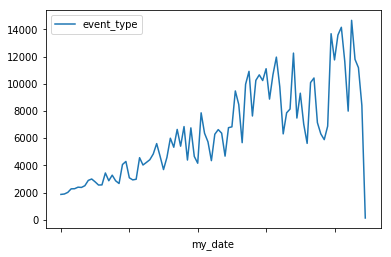

In [36]:
data1.plot()

In [37]:
right_format = data1.reset_index(drop = True).event_type

In [39]:
right_format.head()

0    1867
1    1896
2    2013
3    2276
4    2285
Name: event_type, dtype: int64

In [53]:
x = right_format.index
y = right_format.values

In [54]:
coefs = np.polyfit(x, y, 1)
predict = np.poly1d(coefs)

In [55]:
from sklearn.metrics import r2_score
r2_score(y, predict(x))

0.6240019278660067

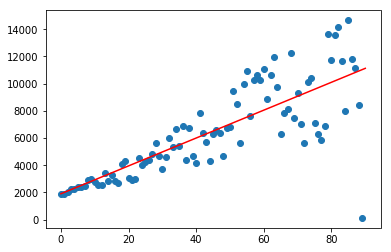

In [56]:
x_test = np.linspace(0, 90)
y_pred = predict(x_test[:, None])
plt.scatter(x, y)
plt.plot(x_test, y_pred, c = 'r')
plt.show()

In [57]:
predict(90+30)

14197.61554924476